<a href="https://colab.research.google.com/github/UmmuHusnul/Assignment-7-Tugas-1-PCD/blob/main/assignment7_tugas1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 7 Tugas 1**

- Audry Jesica Putri (1301204119)

- Ummu Husnul Khatimah (1301204120)

In [ ]:
!pip install opencv-python
!pip install matplotlib

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
image_path = 'assignment7.png'
image_rgb = cv2.imread(image_path)

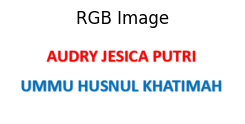

In [ ]:
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB)), plt.title('RGB Image'), plt.axis('off')
plt.show()

In [ ]:
image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)

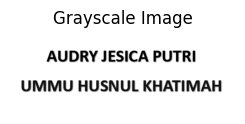

In [ ]:
plt.subplot(1, 2, 1), plt.imshow(image_gray, cmap='gray'), plt.title('Grayscale Image'), plt.axis('off')
plt.show()

In [ ]:
#Konversi image grayscale ke binary image
_, binary_image = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY)

In [ ]:
#Dilasi
dilated_image = cv2.dilate(binary_image, np.ones((5,5), np.uint8), iterations=1)

#Erosi
eroded_image = cv2.erode(binary_image, np.ones((5,5), np.uint8), iterations=1)

#Internal boundary
internal_boundary = eroded_image ^ binary_image

#External boundary
external_boundary = dilated_image ^ binary_image

#Morphological Gradient
morphological_gradient = dilated_image - eroded_image

#Thinning
thinning_image = cv2.ximgproc.thinning(binary_image, thinningType=cv2.ximgproc.THINNING_GUOHALL)

#Thickening
kernel = np.ones((3, 3), np.uint8)
thickening_image = cv2.dilate(binary_image, kernel, iterations=1)

#Skeletonizing
skeletonized_image = cv2.ximgproc.thinning(binary_image, thinningType=cv2.ximgproc.THINNING_ZHANGSUEN)

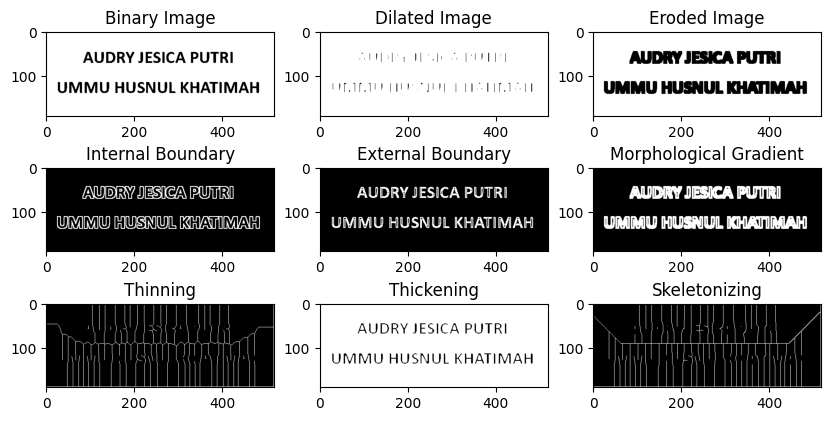

In [ ]:
#Menampilkan Hasil
plt.figure(figsize=(10, 5))

plt.subplot(3, 3, 1), plt.imshow(binary_image, cmap='gray'), plt.title('Binary Image')
plt.subplot(3, 3, 2), plt.imshow(dilated_image, cmap='gray'), plt.title('Dilated Image')
plt.subplot(3, 3, 3), plt.imshow(eroded_image, cmap='gray'), plt.title('Eroded Image')
plt.subplot(3, 3, 4), plt.imshow(internal_boundary, cmap='gray'), plt.title('Internal Boundary')
plt.subplot(3, 3, 5), plt.imshow(external_boundary, cmap='gray'), plt.title('External Boundary')
plt.subplot(3, 3, 6), plt.imshow(morphological_gradient, cmap='gray'), plt.title('Morphological Gradient')
plt.subplot(3, 3, 7), plt.imshow(thinning_image, cmap='gray'), plt.title('Thinning')
plt.subplot(3, 3, 8), plt.imshow(thickening_image, cmap='gray'), plt.title('Thickening')
plt.subplot(3, 3, 9), plt.imshow(skeletonized_image, cmap='gray'), plt.title('Skeletonizing')
plt.show()